In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("../data/clean_data_final.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,4,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,5,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,1,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed,148000.0,2.381504
22886,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


<AxesSubplot:xlabel='harmonized_salary', ylabel='Count'>

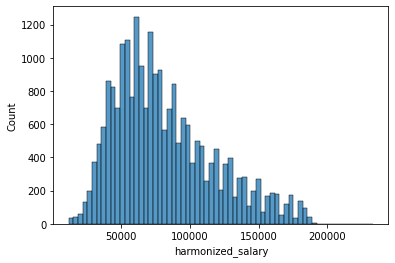

In [3]:
sns.histplot(data=df, x="harmonized_salary")

<AxesSubplot:xlabel='payed', ylabel='count'>

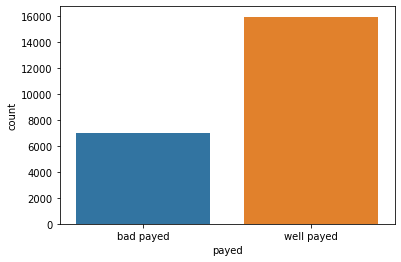

In [4]:
sns.countplot(data=df, x="payed")

# Try to predict salary without the results of unsupervised analysis

In [150]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [92]:
df_used = df[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            "payed",
            "harmonized_salary"
        ]
    ].copy()

In [93]:
df_used["highest_level_of_education_completed"].unique()

array(["Master's degree", 'College degree', 'PhD', 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [94]:
df_used["how_old_are_you"] = df_used["how_old_are_you"].apply(
    lambda x:
        1 if x=="under 18" else
        2 if x=="18-24" else
        3 if x=="25-34" else
        4 if x=="35-44" else
        5 if x=="45-54" else
        6 if x=="55-64" else
        7
)

In [95]:
df_used["years_of_experience_in_field"] = df_used["years_of_experience_in_field"].apply(
    lambda x:
        1 if x=="1 year or less" else
        2 if x=="2 - 4 years" else
        3 if x=="5-7 years" else
        4 if x=="8 - 10 years" else
        5 if x=="11 - 20 years" else
        6 if x=="21 - 30 years" else
        7 if x=="31 - 40 years" else
        8
)

In [96]:
df_used["highest_level_of_education_completed"] = df_used["highest_level_of_education_completed"].apply(
    lambda x:
        1 if x=="High School" else
        2 if x=="Some college" else
        3 if x=="College degree" else
        4 if x=="Master's degree" else
        5 if x=="PhD" else
        6 
)

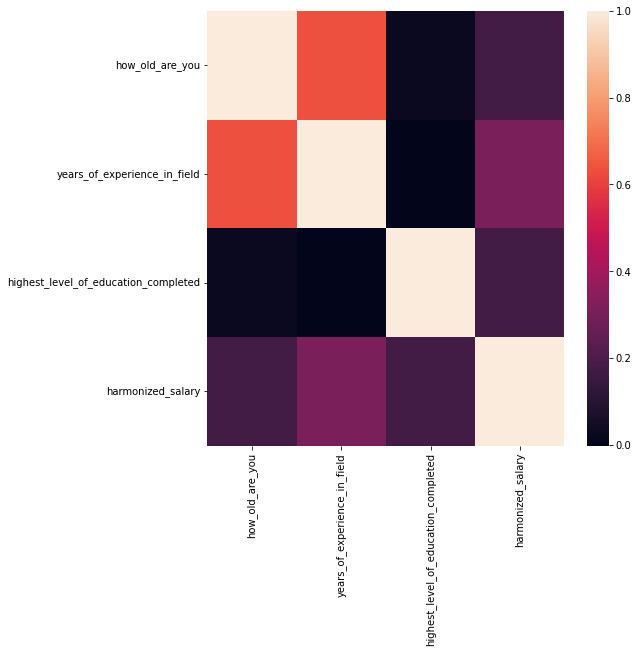

In [91]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_used.corr())
plt.show()

In [97]:
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=29)
randomf = RandomForestRegressor(random_state=29)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    df_used[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            #"payed"
        ]
    ],
    df["harmonized_salary"],
    train_size=0.8,
    random_state=29
)

In [125]:
X_train

,how_old_are_you,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,cluster
3616,4,5,4,Man,Other,3
6461,3,4,3,Woman,Technology & Science,0
22262,3,2,3,Woman,Public & Government,2
6715,4,4,3,Woman,Consulting,1
7179,5,6,5,Woman,Education,3
...,...,...,...,...,...,...
10601,3,2,4,Woman,Health,2
864,3,1,3,Woman,Non profit Organization,5
808,4,5,5,Woman,Public & Government,1
10749,3,4,3,Man,Industry,0


In [153]:
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)

## Linear Regression

In [127]:
linear.fit(X_train_used, y_train)
predictions = linear.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

30326.463032043353


In [10]:
#mse = make_scorer(mean_squared_error,greater_is_better=False)
parameters = {
    "fit_intercept": (True, False),
    "n_jobs": (None, 1, 2, 3, 4, 5),
    "positive": (True, False)
}

clf = GridSearchCV(linear, param_grid=parameters)
clf.fit(X_train_used, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'n_jobs': (None, 1, 2, 3, 4, 5),
                         'positive': (True, False)})

In [11]:
clf.best_estimator_

LinearRegression(fit_intercept=False)

In [128]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train_used, y_train)
predictions = linear_model.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

30326.463032043357


<AxesSubplot:xlabel='harmonized_salary'>

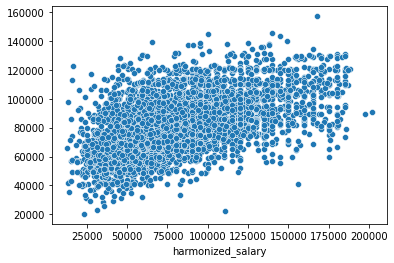

In [30]:
sns.scatterplot(x=y_test, y=predictions)

## Decision Tree

In [129]:
tree.fit(X_train_used, y_train)
predictions = tree.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

31795.97645706781


In [25]:
clf.best_estimator_

DecisionTreeRegressor(max_features='auto', min_weight_fraction_leaf=0.001,
                      random_state=29, splitter='random')

In [130]:
tree_model = DecisionTreeRegressor(max_features='auto', min_weight_fraction_leaf=0.001,random_state=29, splitter='random')
tree_model.fit(X_train_used, y_train)
predictions = tree_model.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

30386.56844319158


## Random forest

In [131]:
randomf.fit(X_train_used, y_train)
predictions = randomf.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

30957.583103779038


In [39]:
parameters = {
    "n_estimators": (40, 50),
    "criterion": ("squared_error", "absolute_error", "poisson"),
    "max_features": (None, "sqrt", "log2"),
}

clf = GridSearchCV(randomf, param_grid=parameters)
clf.fit(X_train_used.values, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=29),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'poisson'),
                         'max_features': (None, 'sqrt', 'log2'),
                         'n_estimators': (40, 50)})

In [40]:
clf.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=50, random_state=29)

In [132]:
randomf_model = RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=50, random_state=29)
randomf_model.fit(X_train_used, y_train)
predictions = randomf_model.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

30952.95341392667


In [182]:
cross_linear = cross_val_score(linear_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_linear = np.abs(cross_linear)
cross_tree = cross_val_score(tree_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_tree = np.abs(cross_tree)
cross_random = cross_val_score(randomf_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_random = np.abs(cross_random)
knn = KNeighborsRegressor()
cross_knn = cross_val_score(knn, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_knn = np.abs(cross_knn)

In [183]:
cross_df = pd.DataFrame([cross_linear, cross_tree, cross_random, cross_knn]).T
cross_df.columns = ["linear_regression", "decision_tree", "random_forest", "knn"]
cross_df

,linear_regression,decision_tree,random_forest,knn
0,30951.580739,31175.052484,31743.449852,33400.549374
1,30156.556805,30710.791113,31367.878403,33313.307844
2,30499.539794,30864.248204,31288.129480,33618.561981
3,30600.886929,30229.501063,31015.468583,32597.855552
4,31176.484538,31065.753499,31568.641152,33563.669365
5,29344.085571,29122.459300,30216.365604,31691.379444
6,30577.777415,30446.131566,31244.997319,33072.310165
7,30453.755701,30471.645458,31574.935825,32515.288149
8,31066.303545,31159.741601,31291.452430,32905.047503
9,30544.272102,31070.186891,31588.532481,33333.524920


Text(0, 0.5, 'RMSE value')

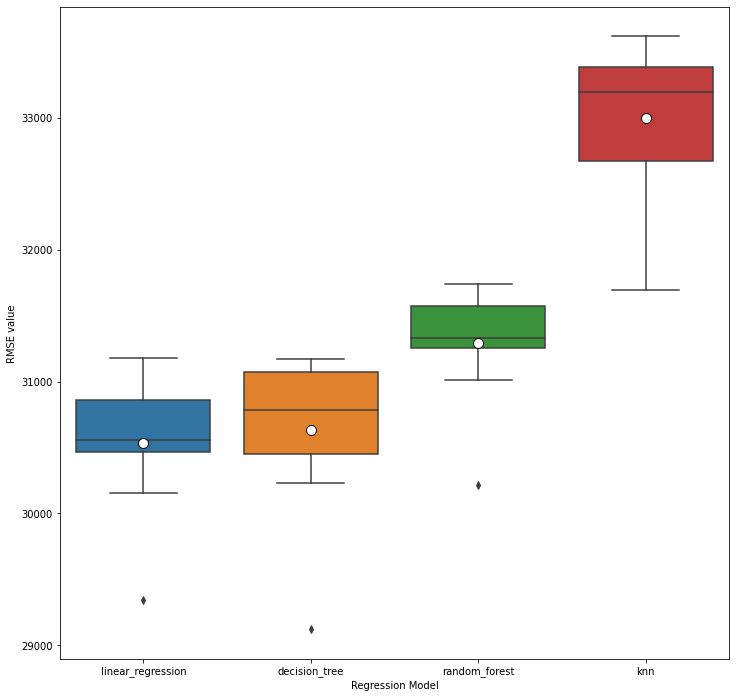

In [184]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=cross_df.melt(), x="variable", y="value", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Regression Model")
plt.ylabel("RMSE value")

In [77]:
cross_df.mean()

linear           30535.554359
tree             30625.723800
random_forest    31291.208117
dtype: float64

In [100]:
df["harmonized_salary"].mean()

81548.19577464173

In [103]:
y_train.mean()

81759.70989295468

# Try to predict salary with results of unsupervised learning

In [40]:
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=29)
randomf = RandomForestRegressor(random_state=29)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            "payed",
            #"adjusted_annual_salary"
        ]
    ],
    df["harmonized_salary"],
    train_size=0.8,
    random_state=29
)

In [42]:
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)

## Linear regression

In [43]:
linear.fit(X_train_used, y_train)
predictions = linear.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

25529.787430392167


In [59]:
parameters = {
    "fit_intercept": (True, False),
    "n_jobs": (None, 1, 2, 3, 4, 5),
    "positive": (True, False)
}

clf = GridSearchCV(linear, param_grid=parameters)
clf.fit(X_train_used, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'n_jobs': (None, 1, 2, 3, 4, 5),
                         'positive': (True, False)})

In [60]:
clf.best_estimator_

LinearRegression(fit_intercept=False, positive=True)

In [44]:
linear_model = LinearRegression(fit_intercept=False, positive=True)
linear_model.fit(X_train_used, y_train)
predictions = linear_model.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

25532.868835258283


In [45]:
cross_linear = cross_val_score(linear_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_tree = cross_val_score(tree_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)
cross_random = cross_val_score(randomf_model, X_train_used, y_train, scoring="neg_root_mean_squared_error", cv=10)

In [46]:
cross_linear = np.abs(cross_linear)
cross_tree = np.abs(cross_tree)
cross_random = np.abs(cross_random)

In [47]:
cross_df = pd.DataFrame([cross_linear, cross_tree, cross_random]).T
cross_df.columns = ["linear", "tree", "random_forest"]
cross_df

,linear,tree,random_forest
0,25318.448092,25298.258405,25790.039862
1,25205.670380,25188.893858,26000.103762
2,26172.254406,26090.675436,26301.746116
3,25884.451629,25458.554133,26092.692641
4,25899.052295,25414.312534,25835.273667
5,25262.929945,24793.763108,25683.132738
6,26044.187954,25685.758505,26212.434431
7,25980.525140,25792.304110,26935.147798
8,26063.689259,25752.175421,26191.739132
9,26322.069513,26273.032850,26561.738912


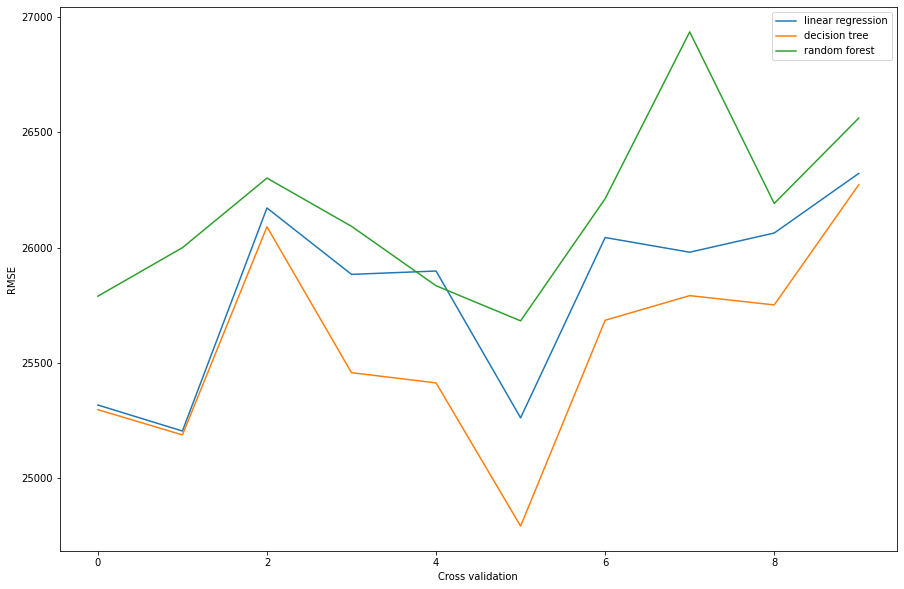

In [48]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=cross_df, x=cross_df.index, y="linear", label="linear regression")
sns.lineplot(data=cross_df, x=cross_df.index, y="tree", label="decision tree")
sns.lineplot(data=cross_df, x=cross_df.index, y="random_forest", label="random forest")
plt.xlabel("Cross validation")
plt.ylabel("RMSE")
plt.show()

In [50]:
cross_linear.mean()

25815.327861213118

In [51]:
cross_tree.mean()

25574.772835946045

<AxesSubplot:xlabel='harmonized_salary'>

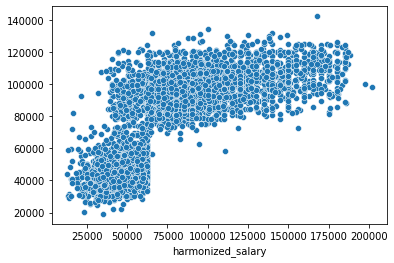

In [49]:
sns.scatterplot(x=y_test, y=predictions)

## Decision Tree

In [115]:
tree.fit(X_train_used, y_train)
predictions = tree.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
print(rmse)

31688.804015610756


In [76]:
parameters = {
    "criterion": ("squared_error", "friedman_mse", "absolute_error", "poisson"),
    "splitter": ("best", "random"),
    "min_weight_fraction_leaf": (0, 0.0001, 0.001, 0.01, 0.1),
    "max_features": ("auto", "sqrt", "log2"),
}

clf = GridSearchCV(tree, param_grid=parameters)
clf.fit(X_train_used, y_train)

KeyboardInterrupt: 

# Predictions of salary level

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    df_used[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            #"payed",
            #"adjusted_annual_salary"
        ]
    ],
    df["payed"],
    train_size=0.8,
    random_state=29
)
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

              precision    recall  f1-score   support

   bad payed       0.70      0.32      0.44      1404
  well payed       0.76      0.94      0.84      3174

    accuracy                           0.75      4578
   macro avg       0.73      0.63      0.64      4578
weighted avg       0.74      0.75      0.72      4578



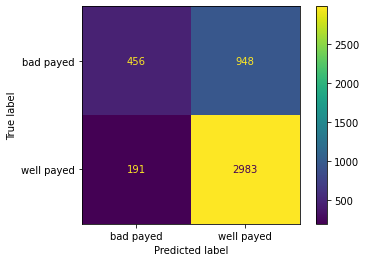

In [113]:
svm = SVC()
svm.fit(X_train_used, y_train)
predictions = svm.predict(X_test_used)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
disp.plot()

              precision    recall  f1-score   support

   bad payed       0.68      0.42      0.52      1404
  well payed       0.78      0.91      0.84      3174

    accuracy                           0.76      4578
   macro avg       0.73      0.66      0.68      4578
weighted avg       0.75      0.76      0.74      4578



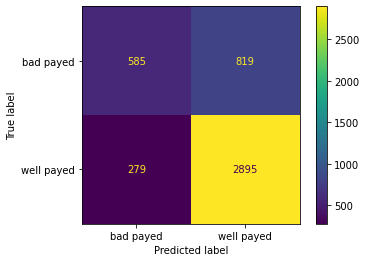

In [171]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag',
                   tol=0.01)
lr.fit(X_train_used, y_train)
predictions = lr.predict(X_test_used)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [172]:
pd.Series(predictions).value_counts()

well payed    3714
bad payed      864
dtype: int64

In [173]:
print(lr.score(X_train_used, y_train))
print(lr.score(X_test_used, y_test))

0.7545603495357728
0.7601572739187418


              precision    recall  f1-score   support

   bad payed       0.59      0.48      0.53      1404
  well payed       0.79      0.85      0.82      3174

    accuracy                           0.74      4578
   macro avg       0.69      0.67      0.68      4578
weighted avg       0.73      0.74      0.73      4578



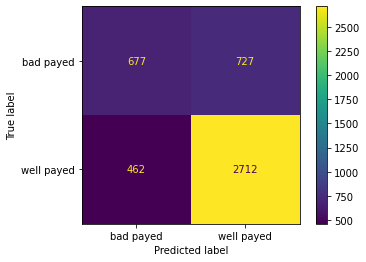

In [174]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_used, y_train)
predictions = dtree.predict(X_test_used)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

              precision    recall  f1-score   support

   bad payed       0.59      0.48      0.53      1404
  well payed       0.79      0.85      0.82      3174

    accuracy                           0.74      4578
   macro avg       0.69      0.67      0.67      4578
weighted avg       0.73      0.74      0.73      4578



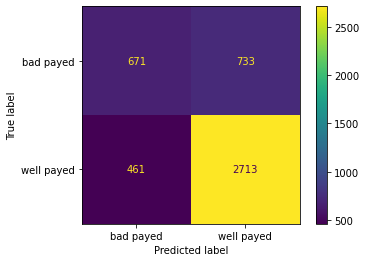

In [175]:
rf = DecisionTreeClassifier()
rf.fit(X_train_used, y_train)
predictions = rf.predict(X_test_used)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [176]:
cross_linear = cross_val_score(lr, X_train_used, y_train, cv=10, scoring="accuracy")
cross_tree = cross_val_score(dtree, X_train_used, y_train, cv=10, scoring="accuracy")
cross_random = cross_val_score(rf, X_train_used, y_train, cv=10, scoring="accuracy")
cross_knn = cross_val_score(KNeighborsClassifier(), X_train_used, y_train, cv=10, scoring="accuracy")
cross_ada = cross_val_score(AdaBoostClassifier(), X_train_used, y_train, cv=10, scoring="accuracy")

In [177]:
np.mean(cross_tree)

0.7350081922446751

Text(0, 0.5, 'Accuracy Score')

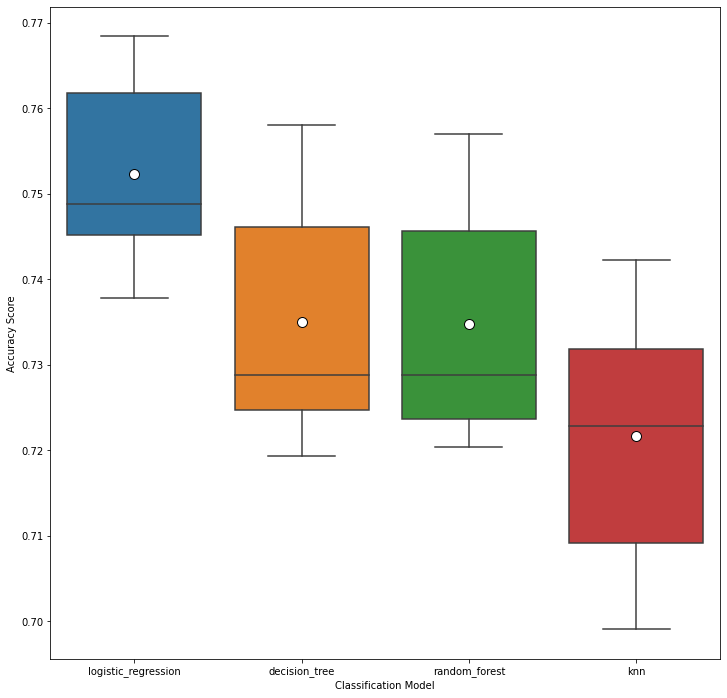

In [180]:
cross_df = pd.DataFrame([cross_linear, cross_tree, cross_random, cross_knn]).T
cross_df.columns = ["logistic_regression", "decision_tree", "random_forest", "knn"]
plt.figure(figsize=(12, 12))
sns.boxplot(data=cross_df.melt(), x="variable", y="value", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")

In [122]:
cross_df.mean()

linear           0.752922
tree             0.734298
random_forest    0.734790
dtype: float64

## Choose best model

In [165]:
parameters = {
    "penalty": ("l1", "l2", "elasticnet", None),
    "tol": (0.00001, 0.0001, 0.001, 0.01, 0.1),
    "fit_intercept": (True, False),
    "solver": ("newton-cg", "sag", "saga"),
    "max_iter": (100, 1000, 10000),
    "multi_class": ("auto", "ovr", "multinomial"),
}

clf = GridSearchCV(lr, param_grid=parameters)
clf.fit(X_train_used, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': (True, False),
                         'max_iter': (100, 1000, 10000),
                         'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('newton-cg', 'sag', 'saga'),
                         'tol': (1e-05, 0.0001, 0.001, 0.01, 0.1)})

In [166]:
clf.best_estimator_

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag',
                   tol=0.01)

                 precision    recall  f1-score   support

      bad payed       0.65      0.46      0.54      1404
very well payed       0.57      0.23      0.33       755
     well payed       0.60      0.82      0.69      2419

       accuracy                           0.61      4578
      macro avg       0.61      0.50      0.52      4578
   weighted avg       0.61      0.61      0.59      4578



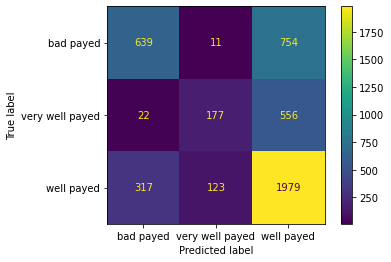

In [167]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag',
                   tol=0.01)
lr.fit(X_train_used, y_train)
predictions = lr.predict(X_test_used)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()